## <center>Linear Regression Model Representation & Implementation From Scratch using Python</center>

<img src="https://github.com/DiegoHurtad0/Linear-Regression-Model-Representation-Implementation-From-Scratch-using-Python/blob/main/Figures/regression_result1.png?raw=true" width="900" height="600">

[Msc. Diego Hurtado](https://www.linkedin.com/in/diegohurtadoo/)

# 1. Introduction

The goal of this notebook is to implement linear regression from scratch using the mathematical Model Representation with Python. first, solving a simple linear regression with one variable, then solving a multiple linear regression model for housing prediction and comparing the results with the pre-build classes of sklearn, and finally using a more complex dataset: the House Prices - Advanced Regression Techniques to Predict sales prices.

You can check the medium story that I wrote:

<img src="https://www.vectorlogo.zone/logos/medium/medium-tile.svg" align='left' alt="plotly" width="60" height="60"/> </a><a> 
[Msc. Diego O’HURTADO](https://medium.com/@diego.hurtado.olivares/linear-regression-from-scratch-15bfd15dc2e)

## Linear Regression

Linear regression is a statistical method used to model the linear relationship between a dependent variable, denoted as Y, and one or more independent variables, denoted as X. 

The goal of linear regression is to find the line of best fit that minimizes the distance between the points and the line.

The equation for a simple linear regression model with one predictor variable is:

Y = b0 + b1 * X

Where b0 is the intercept term and b1 is the coefficient for the predictor variable X.

In a multiple linear regression model with multiple predictor variables, the equation can be written as:

Y = b0 + b1 * X1 + b2 * X2 + ... + bn * Xn

where X1, X2, ..., Xn are the predictor variables and b1, b2, ..., bn are the corresponding coefficients.

Linear regression can be used to make predictions about the value of the dependent variable given a set of predictor variables. The coefficients of the model can be estimated using a variety of techniques, such as the ordinary least squares method.

Linear regression is a widely used and well-understood technique that is simple to implement and easy to interpret. It is a powerful tool for understanding the relationships between different variables and can be used to make informed decisions.

## Inspirations

The model formulation and implementation are based on the [Machine Learning Specialization](https://www.coursera.org/specializations/machine-learning-introduction) program created in collaboration between DeepLearning.AI and Stanford Online, that teaches teach you the fundamentals of machine learning and how to Build machine learning models in Python using popular machine learning libraries with NumPy

# Table of contents <a id='0.1'></a>

* [Introduction](#1)

* [Linear Regression with one variable](#2)
    * [Plotting the Data](#2.1)
    * [Gradient Descent](#2.2)
        * [Update Equations](#2.1.1)
        * [Implementation](#2.1.2)
        * [Computing the cost  𝐽(𝜃)](#2.1.3)
        * [Gradient descent method](#2.1.4)
    * [Prediction with one variable](#2.3)
        * [Predictions from Linear Regresion Algorithm from scratch](#2.3.1)
        * [predictions of LinearRegression Model from sklearn](#2.3.2)
    * [Visualizing  𝐽(𝜃)](#2.4)
    * [Visualizing Linear Fit](#2.5)
    
* [Linear regression with multiple variables](#3)
    * [Feature Normalization](#3.1)
        * [Feature Normalization from scratch](#3.1.1)
        * [Feature Normalization from StandardScaler utility class](#3.1.2)
        * [Feature Normalization](#3.1.3)
    * [Gradient Descent Multi](#3.2)
        * [Selecting learning rates](#3.2.1)
    * [Predict House Price](#3.3)
        * [Regression Evaluation Metrics](#3.3.1)
            * [Mean Absolute Error (MAE)](#3.3.1.1)
            * [Mean Squared Error (MSE)](#3.3.1.2)
            * [Root Mean Squared Error (RMSE)](#3.3.1.3)
        * [Predict House Price using our model](#3.3.2)
        * [Predict House Price using LinearRegression Model From sklearn.linear_model](#3.3.3)
        * [Setting up train and test split](#3.3.4)
        * [Linear Regression](#3.3.5)
        * [Lasso Regression (L1 Regularization)](#3.3.6)
        * [Ridge Regression (L2 Regularization)](#3.3.7)
        * [Hyperparameter tunning](#3.3.8)
            * [Hyperparameter tunning Ridge Regression (L2 Regularization)](#3.3.8.1)
            * [Hyperparameter tunning Lasso Regression (L1 Regularization)](#3.3.8.2)
            * [Hyperparameter tunning ElasticNet Regression](#3.3.8.3)
        * [Normal Equations](#3.3.9)
* [Linear regression with multiple variables](#4)
    * [Dataset from Kaggle](#4.1)
    * [EDA](#4.2)
    * [Data PreProcessing](#4.3)
        * [Normalization, remove outliers and Skewness](#4.3.1)
        * [Data Imputation](#4.3.2)
        * [Create new features](#4.3.3)
        * [Data transformation](#4.3.4)
        * [Feature scaling](#4.3.5)
    * [House Prediction Kaggle](#4.4)
        * [Train and test datasets](#4.4.1)
        * [Prediction using simple regression model](#4.4.2)
        * [Advanced Regression Techniques (Future Work](#4.4.2)
* [Conclusions](#5)


[Msc. Diego Hurtado](https://www.linkedin.com/in/diegohurtadoo/)

## 2 Linear regression with one variable

Linear regression with one variable is a statistical method used to model the relationship between a single independent variable (x) and a dependent variable (y). It assumes that the relationship between the two variables is linear, meaning that y is a linear function of x. The goal of linear regression is to find the best-fitting line through the data points, which can be used to make predictions about the value of y for any given value of x. The best-fitting line is determined by finding the values of the slope and y-intercept that minimize the sum of the squared differences between the predicted and actual values of y. This method is also known as simple linear regression.


In this part of the exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next. 

The file `dataset1.txt` contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. 

In [2]:
import numpy as np
import pandas as pd


#Read the text file (csv)
df = pd.read_csv('https://raw.githubusercontent.com/DiegoHurtad0/Linear-Regression-Model-Representation-Implementation-From-Scratch-using-Python/main/data/dataset1.txt', skiprows = 0, header = None, names = ['population', 'profit'])
#Form the usual "X" matrix and "y" vector
X = df[['population']]['population'].values
y = df[['profit']].values

m = y.size #number of training examples

#Reshape y to a mx1 matrix
y = y.reshape((m, 1))

df.head(3)

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620


In [3]:
def get_percent_missing(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                         'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True)
    percent_missing = df.isnull().sum() * 100 / len(df)

    return percent_missing

In [4]:
get_percent_missing(df)

population    0.0
profit        0.0
dtype: float64

<div class="alert alert-block alert-warning">
**Implementation Note:** The Dataset Does not need data cleaning process </div>

### 2.1 Plotting the Data

![](https://github.com/DiegoHurtad0/Linear-Regression-Model-Representation-Implementation-From-Scratch-using-Python/blob/main/Figures/dataset1.png?raw=true)

## 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

Gradient descent is an optimization algorithm used to minimize a function. It works by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.

In mathematical terms, suppose we have a function f(x) that we want to minimize, where x is a vector of parameters. The gradient of the function with respect to the parameters is a vector of partial derivatives of the function with respect to each parameter


The gradient points in the direction of greatest increase of the function, so to minimize the function, we can move in the opposite direction, which is the direction of steepest descent. This is done by updating the parameters in the opposite direction of the gradient:

where η is the learning rate, which determines the step size at each iteration.

The process of updating the parameters in this way is repeated until the cost function converges to a minimum or until a pre-determined number of iterations is reached.

### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

### 2.2.2 Implementation

We have already set up the data for linear regression. In the following cell, we add another dimension to our data to accommodate the $\theta_0$ intercept term. Do NOT execute this cell more than once.

In [5]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X], axis=1)

### 2.2.3 Computing the cost $J(\theta)$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

Your next task is to complete the code for the function `computeCost` which computes $J(\theta)$. As you are doing this, remember that the variables $X$ and $y$ are not scalar values, but matrices whose rows represent
the examples from the training set.

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

In [6]:
def computeCost(X, y, theta):
    m = y.size  # number of training examples
    # You need to return the following variables correctly
    J = 0.0
    J = 1./(2. * m) * np.sum((np.dot(X, theta) - y)**2)
    return J

Once you have completed the function, the next step will run `computeCost` two times using two different initializations of $\theta$. You will see the cost printed to the screen.

### 2.2.4 Gradient descent

Next, you will implement gradient descent in a function.
The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration. 

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. Refer to the equations in this notebook and to the lectures slides if you are uncertain. A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. 

The starter code for the function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a `python` list. Assuming you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [7]:
def gradientDescent(X, y, theta, alpha, num_iters):
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    # are passed by reference to functions
    theta = theta.copy()
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        theta = theta - (alpha/m) * np.dot(X.T, (np.dot(X, theta) - y))
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

After you are finished call the implemented `gradientDescent` function and print the computed $\theta$. We initialize the $\theta$ parameters to 0 and the learning rate $\alpha$ to 0.01. Execute the following cell to check your code.

In [8]:
# initialize fitting parameters
theta = np.zeros((2, 1))
# some gradient descent settings
iterations = 1500
alpha = 0.01

# run gradient descent
theta, J_hist = gradientDescent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent:')
print('𝜃 = ' + str(theta[0][0])  + ' , ' + str(theta[1][0]) )

Theta found by gradient descent:

𝜃 = -3.6302914394043593 , 1.1663623503355818


## 2.3 Prediction of Profits for a Food Truck

In [9]:
prediction_Value = 7 #Value to predict , population un 10,000s

## 2.3.1 Predictions from Linear Regresion Algorithm from scratch 

In [10]:
predict2 = np.dot([[1, 7]], theta)
print('The 𝜃 value: ' + str(theta[0][0])  + ' , ' + str(theta[1][0]) )
print('For population = 70,000, we predict a profit of ', round(predict2[0][0]*10000, 2))

The 𝜃 value: -3.6302914394043593 , 1.1663623503355818

For population = 70,000, we predict a profit of  45342.45


## 2.2.2 predictions of LinearRegression Model from sklearn

I am comparing the results using the class of the sklearn LinearRegression module that contains different functions for performing machine learning with linear models

In [11]:
from sklearn.linear_model import LinearRegression

X_ = df[['population']]
y_ = df[['profit']]

reg = LinearRegression().fit(X_, y_)
print('Score:')
print(reg.score(X_, y_))

print('The 𝜃 value: ' + str(reg.intercept_[0]) + ' , ' + str(reg.coef_[0][0]))
print('For population = 70,000, we predict a profit of $', round(reg.predict(np.array([[7]]))[0][0] * 10000, 2))

Score:

0.7020315537841397

The 𝜃 value: -3.89578087831185 , 1.1930336441895935

For population = 70,000, we predict a profit of $ 44554.55


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names

  warnings.warn(


### 2.4 Visualizing $J(\theta)$

To understand the cost function $J(\theta)$ better, you will now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

In the next cell, the code is set up to calculate $J(\theta)$ over a grid of values using the `computeCost` function that you wrote. After executing the following cell, you will have a 2-D array of $J(\theta)$ values. Then, those values are used to produce surface and contour plots of $J(\theta)$ using the matplotlib `plot_surface` and `contourf` functions. The plots should look something like the following:

In [12]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [[theta0], [theta1]])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

![](https://github.com/DiegoHurtad0/Linear-Regression-Model-Representation-Implementation-From-Scratch-using-Python/blob/main/Figures/cost_function.png?raw=true)

![](https://github.com/DiegoHurtad0/Linear-Regression-Model-Representation-Implementation-From-Scratch-using-Python/blob/main/Figures/contour.png?raw=true)

The purpose of these graphs is to show you how $J(\theta)$ varies with changes in $\theta_0$ and $\theta_1$. The cost function $J(\theta)$ is bowl-shaped and has a global minimum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point.

## 2.4 Visualizing Linear Fit

We will use your final parameters to plot the linear fit.

![](https://github.com/DiegoHurtad0/Linear-Regression-Model-Representation-Implementation-From-Scratch-using-Python/blob/main/Figures/regression_result1.png?raw=true)

# 3 Linear regression with multiple variables




In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

Linear regression in the context of house prediction, linear regression can be used to predict the value of a house based on a set of predictor variables such as size, location, age, and number of bedrooms.

The goal of linear regression is to find the line of best fit that minimizes the distance between the points and the line. The equation of this line can be used to make predictions about the value of a house given a set of predictor variables.

Linear regression is a widely used and well-understood technique that is simple to implement and easy to interpret. It is a powerful tool for understanding the relationships between different variables and can be used to make informed decisions about the value of a house.

The file `dataset2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house. 

In [13]:
#Load Data
df = pd.read_csv('https://raw.githubusercontent.com/DiegoHurtad0/Linear-Regression-Model-Representation-Implementation-From-Scratch-using-Python/main/data/dataset2.txt', skiprows = 0, header = None, names = ['size sq-ft', 'bedrooms', 'price'])
X = df[['size sq-ft', 'bedrooms']].values
y = df[['price']].values
m = y.size
#Reshape y to a mx1 matrix
y = y.reshape((m, 1))

df.head(5)

,size sq-ft,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 3.1 Feature Normalization

Feature normalization is a technique used to transform the values of numeric columns in a dataset to a common scale, without distorting differences in the range or distribution of the data. This can be useful for machine learning models that use optimization algorithms that require features to be on a similar scale in order to work effectively.

There are several methods for normalizing features, but one common method is to subtract the mean of the feature from each value, and then divide the result by the standard deviation of the feature. This scales the feature values to have zero mean and unit variance.

For example, suppose we have a dataset with a numeric column x. To normalize this feature, we can apply the following transformation to each value xi in the column:

xi_normalized = (xi - mean(x)) / std(x)

where mean(x) and std(x) are the mean and standard deviation of the feature x, respectively.

Another method for normalizing features is to scale the values to a fixed range, such as [0, 1] or [-1, 1]. This can be done by subtracting the minimum value of the feature from each value, and then dividing the result by the range (max - min) of the feature.

Normalizing features can help machine learning algorithms to converge faster and perform better, but it is important to remember to apply the same normalization transformation to the test set when evaluating the model.

We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min). In `numpy`, you can use the `std` function to compute the standard deviation. 

## 3.1.1 Feature Normalization from scratch

In [14]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    
    X_norm = X_norm - mu
    X_norm = X_norm / sigma
    return X_norm, mu, sigma

## 3.1.2 Feature Normalization from StandardScaler utility class

The preprocessing module provides the StandardScaler utility class, which is a quick and easy way to perform the following operation on an array-like dataset:

In [15]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)

Execute the next cell to run the implemented `featureNormalize` function.

## 3.1.3 Feature Normalization

In [16]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [2000.68085106    3.17021277]

Computed standard deviation: [7.86202619e+02 7.52842809e-01]


In [17]:
# call featureNormalize on the loaded data
X_scaled = scaler.transform(X)
print('Computed mean:', scaler.mean_)
print('Computed standard deviation:', sigma)

Computed mean: [2000.68085106    3.17021277]

Computed standard deviation: [7.86202619e+02 7.52842809e-01]


## Comparing the results

In [18]:
np.array_equal(X_norm, X_scaled)

True

After the `featureNormalize` function is tested, we now add the intercept term to `X_norm`:

In [19]:
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis = 1)

## 3.2 Gradient Descent Multi

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update
rule remain unchanged. 

You should complete the code for the functions `computeCostMulti` and `gradientDescentMulti` to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.
Make sure your code supports any number of features and is well-vectorized.
You can use the `shape` property of `numpy` arrays to find out how many features are present in the dataset.

**Implementation Note:** In the multivariate case, the cost function can
also be written in the following vectorized form:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

where

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

the vectorized version is efficient when you are working with numerical computing tools like `numpy`. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.

</div>

In [20]:
def computeCostMulti(X, y, theta):
    m = y.shape[0] # number of training examples
    J = 0.0
    J = 1./(2. * m) * np.sum((np.dot(X, theta) - y)**2)
    return J

In [21]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha/m) * np.dot(X.T, (np.dot(X, theta) - y))
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

## 3.2.1 Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly. You can change the learning rate by modifying the following code and changing the part of the code that sets the learning rate.

Use your implementation of `gradientDescentMulti` function and run gradient descent for about 50 iterations at the chosen learning rate. The function should also return the history of $J(\theta)$ values in a vector $J$.

After the last iteration, plot the J values against the number of the iterations.

![](https://github.com/DiegoHurtad0/Linear-Regression-Model-Representation-Implementation-From-Scratch-using-Python/blob/main/Figures/learning_rate.png?raw=true)

If your graph looks very different, especially if your value of $J(\theta)$ increases or even blows up, adjust your learning rate and try again. We recommend trying values of the learning rate $\alpha$ on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

<div class="alert alert-block alert-warning">
**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and ‘blow up’, resulting in values which are too large for computer calculations. In these situations, `numpy` will tend to return
NaNs. NaN stands for ‘not a number’ and is often caused by undefined operations that involve −∞ and +∞.
</div>

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!
Using the best learning rate that you found, run the script
to run gradient descent until convergence to find the final values of $\theta$. Next,
use this value of $\theta$ to predict the price of a house with 1650 square feet and
3 bedrooms. You will use value later to check your implementation of the normal equations. Don’t forget to normalize your features when you make this prediction!

In [22]:
# Choose some alpha value - change this
alpha = 0.01
num_iters = 1500

# init theta and run gradient descent
theta = np.zeros((3, 1))
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

![](https://github.com/DiegoHurtad0/Linear-Regression-Model-Representation-Implementation-From-Scratch-using-Python/blob/main/Figures/learning_rate.png?raw=true)

# 3.3 Predict House Price

## Values to Predict

In [23]:
size_ft = 1650 # sq-ft
bathrooms = 3

## 3.3.1 Regression Evaluation Metrics

Regression evaluation metrics are used to evaluate the performance of a regression model. These metrics provide a quantitative measure of the accuracy of the model's predictions and allow us to compare the performance of different models.

There are several common regression evaluation metrics, including:

Mean absolute error (MAE): This metric measures the average absolute difference between the predicted values and the true values. It is calculated as the sum of the absolute differences between the predicted and true values, divided by the number of samples.

Mean squared error (MSE): This metric measures the average squared difference between the predicted values and the true values. It is calculated as the sum of the squared differences between the predicted and true values, divided by the number of samples.

Root mean squared error (RMSE): This metric is the square root of the mean squared error. It is often used because it is in the same units as the original data, which makes it easier to interpret.

R-squared (R2): This metric is a measure of the goodness of fit of the model. It ranges from 0 to 1, with higher values indicating a better fit.

There are other regression evaluation metrics that can be used, depending on the specific needs of the problem. It is important to choose an appropriate metric that reflects the goals of the model and the characteristics of the data.

## 3.3.1.1 Mean Absolute Error (MAE)

In [24]:
from sklearn.metrics import mean_squared_error

$$ \frac{1}{m} \sum_{i=1}^m \left| y_i - \hat{y_i}\right|$$

## 3.3.1.2 Mean Squared Error (MSE)

In [25]:
from sklearn.metrics import mean_squared_error as mse

$$ \frac{1}{m} \sum_{i=1}^m \left( y_i - \hat{y_i}\right)^2$$

## 3.3.1.3 Root Mean Squared Error (RMSE)

In [26]:
from sklearn.metrics import mean_squared_error

# to the method mean_squared_error() you can pass the argument squared=False to return the RMSE
# mean_squared_error(X_train, y_train, squared=False) 

$$ \sqrt{\frac{1}{m} \sum_{i=1}^m \left( y_i - \hat{y_i}\right)^2} $$

## 3.3.2 Predict House Price using our model

In [27]:
print('theta computed from gradient descent: {:s}'.format(str(theta)))
price = np.dot([1.0 , (size_ft - mu[0])/sigma[0], (bathrooms - mu[1]) / sigma[1]], theta)
print('Predicted price of a 1650 sq-ft, 3 br house: ', round(price[0], 1))

theta computed from gradient descent: [[340412.56301439]

 [109370.05670466]

 [ -6500.61509507]]

Predicted price of a 1650 sq-ft, 3 br house:  293098.5


## 3.3.3 Predict House Price using LinearRegression Model From sklearn.linear_model

In [28]:
X = X_scaled
y = df[['price']]

reg = LinearRegression().fit(X, y)
print('The accuracy of the Linear Regression model:')
print(reg.score(X, y))

print('The 𝜃 value: ' + str(reg.intercept_[0]) + ' , ' + str(reg.coef_[0][0]))
print('Predicted price of a 1650 sq-ft, 3 br house (sklearn.linear_model):', round(reg.predict(np.array([[(size_ft - mu[0])/sigma[0], (bathrooms - mu[1]) / sigma[1]]]))[0][0], 1) )

The accuracy of the Linear Regression model:

0.7329450180289143

The 𝜃 value: 340412.6595744681 , 109447.7964696418

Predicted price of a 1650 sq-ft, 3 br house (sklearn.linear_model): 293081.5


We can observed that prediction is not that 'Good'

**Underfitting** in linear regression occurs when the model is not complex enough to capture the underlying relationship between the independent and dependent variables in the data. This can happen for a few reasons:

- The model is too simple: If the model only has a few parameters, it may not be able to capture the complexity of the data. In such cases, a more complex model with more parameters may be required.

- The data is not linear: If the data has a non-linear relationship between the independent and dependent variables, a linear model will not be able to fit the data well.

- Insufficient data: With limited data, the model may not be able to learn the underlying relationship between the independent and dependent variables.

Underfitting can be identified by low training accuracy and high validation error, which implies that the model is not generalizing well to new unseen data.

In [29]:
print('The dataset size is : ' + str(m) )

The dataset size is : 47


In this case is more likely because of insufficient data

**How to solve Underfitting in linear regression model**
There are several ways to solve underfitting in linear regression:
    
- Adding more features: By adding more features, the model can become more complex, allowing it to capture the underlying relationship between the independent and dependent variables more accurately.
    
- Using non-linear features: Adding non-linear features or interactions between features can help the model capture non-linear relationships in the data.
    
- Using a more complex model: Instead of using a linear model, using a more complex model like polynomial regression, decision tree regression or random forest regression may be able to better fit the data.

- Increasing the amount of data: With more data, the model can learn the underlying relationship between the independent and dependent variables more accurately.

- Regularization: Regularization is a technique that helps to prevent overfitting by adding a penalty term to the loss function to discourage large coefficients. L1 and L2 regularization are the most popular ways of regularizing linear regression.

- Cross-validation: Using cross-validation techniques (such as k-fold cross-validation) can help to identify and avoid overfitting by evaluating the performance of the model on unseen data.

It's important to note that there's no one-size-fits-all solution to underfitting and it may require trying different approaches and experimenting with different parameters to find the best solution.

## 3.3.4 Setting up train and test split

Setting up a train and test split is a common technique used in machine learning to evaluate the performance of a model. The goal of the train and test split is to evaluate the model's ability to generalize to new, unseen data.

In the train and test split, the original dataset is randomly divided into a training set and a testing set. The model is trained on the training set, and then its performance is evaluated on the testing set. This allows the model to be trained and tested on different data, which gives a more realistic evaluation of its performance.

The train and test split is useful because it allows the model to be trained and evaluated in a controlled way. It is important to evaluate the model on unseen data, as this allows us to gauge its performance on data that it has not seen before and determine whether it is overfitting or underfitting.

In summary, setting up a train and test split is an important step in the machine learning process as it helps to evaluate the model's ability to generalize to new, unseen data and ensure that it is not overfitting or underfitting.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

## 3.3.5 Linear Regression with split Dataset

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Create linear regression 
reg = LinearRegression()

#Train the model using the training sets
reg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)
print('The accuracy of the Linear Regression',r2_score(y_test,y_pred))
print('The 𝜃 value: ' + str(reg.intercept_[0]) + ' , ' + str(reg.coef_[0][0]))
print('Predicted price of a 1650 sq-ft, 3 br house (linear_model.LinearRegression):', round(reg.predict(np.array([[(size_ft - mu[0])/sigma[0], (bathrooms - mu[1]) / sigma[1]]]))[0][0], 1) )
print ('RMSE: ', mean_squared_error(y_test, y_pred))

The accuracy of the Linear Regression 0.8268330726601523

The 𝜃 value: 341272.94128357305 , 108050.93183004484

Predicted price of a 1650 sq-ft, 3 br house (linear_model.LinearRegression): 292732.0

RMSE:  2226159168.988815


L1 and L2 regularization are techniques used to prevent overfitting in machine learning models. Overfitting occurs when a model is too complex and has too many parameters, which can lead to poor performance on new, unseen data. Regularization is a way of limiting the complexity of a model by adding a penalty term to the loss function. This penalty term discourages the model from learning too many parameters, which can help improve its generalization ability.

In summary, L1 and L2 regularization are similar in that they both add a penalty term to the loss function to prevent overfitting. The main difference is that L1 regularization encourages sparsity in the model by setting some weights to zero, while L2 regularization encourages weight values to be small but non-zero.

## 3.3.6 Lasso Regression (L1 Regularization)

L1 regularization, also known as Lasso regularization, adds a penalty term to the objective function that is proportional to the absolute value of the coefficients. This results in some coefficients being exactly equal to zero, effectively eliminating them from the model. L1 regularization is useful for feature selection, as it can automatically select the most important features.

In [32]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=0.8)
lasso.fit(X_train, y_train)
y_pred3=lasso.predict(X_test)

print('The accuracy of the Lasso Regression',lasso.score(X_test, y_test))
print('Predicted price of a 1650 sq-ft, 3 br house (linear_model.Lasso):', round(lasso.predict(np.array([[(size_ft - mu[0])/sigma[0], (bathrooms - mu[1]) / sigma[1]]]))[0], 2) )

The accuracy of the Lasso Regression 0.826835942161014

Predicted price of a 1650 sq-ft, 3 br house (linear_model.Lasso): 292732.16


## 3.3.7 Ridge Regression (L2 Regularization)

L2 regularization, also known as Ridge regularization, adds a penalty term to the objective function that is proportional to the square of the coefficients. This results in the coefficients being small, but non-zero. L2 regularization is useful for preventing overfitting and improving the generalization of the model.

In [33]:
from sklearn.linear_model import Ridge

#Create Ridge regression 
ridge = Ridge()

#Train the model using the training sets
ridge.fit(X_train, y_train)
b = float(ridge.intercept_)

# Make predictions using the testing set - Ridge Regression
test_ridge = ridge.predict(X_test)
print('The accuracy of the Ridge Regression is', r2_score(y_test, test_ridge))
print('Predicted price of a 1650 sq-ft, 3 br house (linear_model.Lasso):', round( ridge.predict(np.array([[(size_ft - mu[0])/sigma[0], (bathrooms - mu[1]) / sigma[1]]]))[0][0] , 2) )

The accuracy of the Ridge Regression is 0.8252111037095884

Predicted price of a 1650 sq-ft, 3 br house (linear_model.Lasso): 294635.9


## 3.3.8 Hyperparameter tunning

Hyperparameter tuning is the process of adjusting the hyperparameters of a machine learning model to optimize its performance. Hyperparameters are parameters that are set prior to training the model and are not learned from the training data.

Hyperparameter tuning is an important step in the machine learning process because the performance of the model can be significantly affected by the choice of hyperparameters. Different hyperparameter values can result in drastically different model performance, and finding the optimal values can be a challenging task.

There are several methods for hyperparameter tuning, including manual tuning, grid search, and random search. In manual tuning, the hyperparameters are manually adjusted by the user. In grid search, a predefined set of hyperparameter values is specified, and the model is trained and evaluated using all possible combinations of these values. In random search, the hyperparameter values are chosen randomly from a predefined range.

Hyperparameter tuning can be a time-consuming process, but it is an important step in the machine learning workflow as it can significantly improve the performance of the model.

## 3.3.8.1 Hyperparameter tunning Ridge Regression (L2 Regularization)

In [34]:
#find best alpha for Ridge Regression
from sklearn.model_selection import GridSearchCV

param_grid={'alpha':np.arange(1,10,500)} #range from 1-500 with equal interval of 10 
ridge=Ridge() 
ridge_best_alpha=GridSearchCV(ridge, param_grid)
ridge_best_alpha.fit(X_train,y_train)

print("Best alpha for Ridge Regression:",ridge_best_alpha.best_params_)
print("Best score for Ridge Regression with best alpha:",ridge_best_alpha.best_score_)

Best alpha for Ridge Regression: {'alpha': 1}

Best score for Ridge Regression with best alpha: 0.21304028043863904


## 3.3.8.2 Hyperparameter tunning Lasso Regression (L1 Regularization)

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid={'alpha':np.arange(0,0.1,1)} #range from 0-1 with equal interval of 0.1 
lasso=Lasso() 
lasso_best_alpha=GridSearchCV(lasso, param_grid) 
lasso_best_alpha.fit(X_train,y_train)

print("Best alpha for Lasso Regression:",lasso_best_alpha.best_params_)
print("Best score for Lasso Regression with best alpha:",lasso_best_alpha.best_score_)

Best alpha for Lasso Regression: {'alpha': 0.0}

Best score for Lasso Regression with best alpha: 0.15732202460557382


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

  estimator.fit(X_train, y_train, **fit_params)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.

  model = cd_fast.enet_coordinate_descent(

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.460e+10, tolerance: 3.176e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

  mod

In [36]:
#seting alpha as 20
alpha = lasso_best_alpha.best_score_ 

# Initialising Lasso() with above alpha
lasso = Lasso(alpha=alpha)

#fitting model
lasso.fit(X_train,y_train)

print('The accuracy of the Lasso Regression',lasso.score(X_test, y_test))
print('Predicted price of a 1650 sq-ft, 3 br house (linear_model.Lasso):', round(lasso.predict(np.array([[(size_ft - mu[0])/sigma[0], (bathrooms - mu[1]) / sigma[1]]]))[0], 2) )

The accuracy of the Lasso Regression 0.826833643868359

Predicted price of a 1650 sq-ft, 3 br house (linear_model.Lasso): 292732.05


In [37]:
#seting alpha as 20
alpha = ridge_best_alpha.best_score_ 

# Initialising Ridge() with above alpha
ridge = Ridge(alpha=alpha)

#fitting model
ridge.fit(X_train,y_train)

#printing ridge coeficients
print(ridge.coef_)

print('The accuracy of the Ridge Regression is', r2_score(y_test, test_ridge))
print('Predicted price of a 1650 sq-ft, 3 br house (linear_model.Lasso):', round( ridge.predict(np.array([[(size_ft - mu[0])/sigma[0], (bathrooms - mu[1]) / sigma[1]]]))[0][0] , 2) )

[[107058.96062149   1989.72885466]]

The accuracy of the Ridge Regression is 0.8252111037095884

Predicted price of a 1650 sq-ft, 3 br house (linear_model.Lasso): 293152.11


## 3.3.8.3 Hyperparameter tunning ElasticNet Regression

In [38]:
from sklearn.linear_model import ElasticNet

# list of alpha to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]}

# defining cross validation folds as 5
folds = 8

# Initialising ElasticNet()
elasticnet = ElasticNet() 

#using same attributes used for Ridge tuning except estimator here would be ElasticNet
grid_cv_model = GridSearchCV(
                       estimator=elasticnet,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
#fitingmodel_cv
grid_cv_model.fit(X_train,y_train)

# Checking best  alpha from model_cv
print(grid_cv_model.best_params_)

alpha = grid_cv_model.best_params_["alpha"]

# Defining ElasticNet with above alpha
elasticnet = ElasticNet(alpha=alpha)
  
# fiting elastic net
elasticnet.fit(X_train,y_train)

pred_by_elasticnet = elasticnet.predict(X_test)

print('The accuracy of the Ridge Regression is', round(r2_score(y_test, pred_by_elasticnet), 2))
print(f'ElasticNet RMSE: {np.sqrt(mse(y_test,pred_by_elasticnet))}')
print('Predicted price of a 1650 sq-ft, 3 br house (linear_model.Lasso):', round(elasticnet.predict(np.array([[(size_ft - mu[0])/sigma[0], (bathrooms - mu[1]) / sigma[1]]]))[0], 2) )

Fitting 8 folds for each of 22 candidates, totalling 176 fits

{'alpha': 0.1}

The accuracy of the Ridge Regression is 0.82

ElasticNet RMSE: 47622.30048708616

Predicted price of a 1650 sq-ft, 3 br house (linear_model.Lasso): 295701.11


### 3.3 Normal Equations

In the lecture videos, you learned that the closed-form solution to linear regression is

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. 

First, we will reload the data to ensure that the variables have not been modified. Remember that while you do not need to scale your features, we still need to add a column of 1’s to the $X$ matrix to have an intercept term ($\theta_0$). The code in the next cell will add the column of 1’s to X for you.

In [39]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/DiegoHurtad0/Linear-Regression-Model-Representation-Implementation-From-Scratch-using-Python/main/data/dataset2.txt', skiprows = 0, header = None, names = ['size sq-ft', 'bedrooms', 'price'])
X = df[['size sq-ft', 'bedrooms']].values
y = df[['price']].values
m = y.size
#Reshape y to a mx1 matrix
y = y.reshape((m, 1))
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [40]:
def normalEqn(X, y):
    theta = np.zeros((X.shape[1], 1))
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return theta

Now, once you have found $\theta$ using this
method, use it to make a price prediction for a 1650-square-foot house with
3 bedrooms. You should find that gives the same predicted price as the value
you obtained using the model fit with gradient descent

In [41]:
# Calculate the parameters from the normal equation
theta = normalEqn(X, y);

print('Theta computed from the normal equations: {:s}'.format(str(theta)));

price = np.dot([1.0, size_ft, bathrooms], theta)

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price[0]))

Theta computed from the normal equations: [[89597.9095428 ]

 [  139.21067402]

 [-8738.01911233]]

Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $293081


## 4 Predict House Price

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png" width="900" height="600">

Photo by Tom Thain on Unsplash.

[House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/description)

## 4.1 Dataset

In [42]:
df_train = pd.read_csv('data/train.csv')
print(df_train.shape)
df_test = pd.read_csv('data/test.csv')
print(df_test.shape)

(1460, 81)

(1459, 80)


In [43]:
df_train.sort_values(by = 'Id', ascending = True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [44]:
df_test.sort_values(by = 'Id', ascending = True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [45]:
print('Differencets in Datasets: ' + ' '.join(map(str, list(set(df_train.columns.tolist()) - set(df_test.columns.tolist())))))

Differencets in Datasets: SalePrice


## 4.2 EDA

Exploratory Data Analysis (EDA) is an approach to analyzing and summarizing datasets to gain insights and understanding about the data. It is a crucial step in the data science process as it helps identify patterns, trends, and relationships in the data that can inform later steps in the process such as building models or making decisions. EDA typically involves visualizing the data using graphs and plots, as well as applying statistical techniques to summarize and understand the data. It is called "exploratory" because the analyst is often unsure about what they are looking for in the data and is using EDA to help them discover what the data can tell them.

In [52]:
house_reg = House_Regression()

In [53]:
house_reg.summary(df_train)

House Prices - Advanced Regression Techniques

       /^-^\ 

      / o o \ 

     /   Y   \ 

     V \ v / V

       / - \ 

      /    |

(    /     |

 ===/___) || Diego Hurtado


Dataset contains 1460 rows and 81 columns




FEATURE NAME  DATA FORMAT   NULL VALUES(NUM-PERC)          SAMPLE         

PoolQC          object         1453 - 20.861 %     nan,nan,nan,nan,

MiscFeature     object         1406 - 20.187 %     nan,nan,nan,nan,

Alley           object         1369 - 19.655 %     nan,nan,nan,Grvl,

Fence           object         1179 - 16.927 %     MnWw,nan,nan,MnWw,

FireplaceQu     object         690 - 9.907 %       nan,nan,nan,nan,

LotFrontage     float64        259 - 3.719 %       59.0,50.0,70.0,69.0,

GarageYrBlt     float64        81 - 1.163 %        2006.0,1999.0,1976.0,1954.0,

GarageCond      object         81 - 1.163 %        TA,TA,TA,TA,

GarageType      object         81 - 1.163 %        Detchd,Basment,Attchd,Attchd,

GarageFinish    object         81 - 1.163 %   

In [54]:
house_reg.summary_missing(df_train)

House Prices - Advanced Regression Techniques

Features with missing Values

       /^-^\ 

      / X X \ 

     /   Y   \ 

     V \ - / V

       /   \ 

      /    |

(    /     |

 ===/___) || Diego Hurtado


Dataset contains 1460 rows and 81 columns




FEATURE NAME  DATA FORMAT   NULL VALUES(NUM-PERC)          SAMPLE         

PoolQC          object         1453 - 20.861 %     nan,nan,nan,nan,

MiscFeature     object         1406 - 20.187 %     nan,nan,nan,nan,

Alley           object         1369 - 19.655 %     nan,nan,nan,nan,

Fence           object         1179 - 16.927 %     nan,nan,nan,nan,

FireplaceQu     object         690 - 9.907 %       TA,Gd,Gd,Gd,

LotFrontage     float64        259 - 3.719 %       60.0,60.0,75.0,129.0,

GarageType      object         81 - 1.163 %        Detchd,Attchd,Attchd,Attchd,

GarageYrBlt     float64        81 - 1.163 %        1964.0,1940.0,1970.0,2004.0,

GarageFinish    object         81 - 1.163 %        nan,Unf,Unf,Fin,

GarageQual      obj

In [55]:
# for i in list( dict.fromkeys(df_train[list(df_train.columns[df_train.isnull().any()])].columns.tolist() + df_test[list(df_test.columns[df_test.isnull().any()])].columns.tolist()) ):

In [56]:
house_reg.summary_missing(df_test)

House Prices - Advanced Regression Techniques

Features with missing Values

       /^-^\ 

      / X X \ 

     /   Y   \ 

     V \ - / V

       /   \ 

      /    |

(    /     |

 ===/___) || Diego Hurtado


Dataset contains 1459 rows and 80 columns




FEATURE NAME  DATA FORMAT   NULL VALUES(NUM-PERC)          SAMPLE         

PoolQC          object         1456 - 20.8 %       nan,nan,nan,nan,

MiscFeature     object         1408 - 20.114 %     nan,nan,nan,nan,

Alley           object         1352 - 19.314 %     nan,nan,nan,nan,

Fence           object         1169 - 16.7 %       nan,nan,MnPrv,nan,

FireplaceQu     object         730 - 10.429 %      nan,TA,Fa,nan,

LotFrontage     float64        227 - 3.243 %       69.0,52.0,64.0,61.0,

GarageCond      object         78 - 1.114 %        TA,TA,TA,TA,

GarageYrBlt     float64        78 - 1.114 %        1970.0,1996.0,2005.0,1989.0,

GarageQual      object         78 - 1.114 %        TA,Fa,TA,TA,

GarageFinish    object         78 - 

## 4.3 Data PreProcessing

In [57]:
import warnings
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import plotly.graph_objects as go
import seaborn as sns
warnings.filterwarnings('ignore')

Data preprocessing is the process of preparing a dataset for analysis by cleaning, transforming, and rearranging the data in a suitable format. It is an important step in the data science process because raw data is often noisy and needs to be cleaned and organized before it can be analyzed effectively.

There are several common steps that are often included in data preprocessing:

Handling missing values: As mentioned in a previous answer, missing values need to be identified and replaced with estimates.

Handling outliers: Outliers are extreme values that are significantly different from the majority of the data. They can distort the results of an analysis, so they may need to be identified and either removed or transformed.

Feature scaling: Some machine learning algorithms are sensitive to the scale of the features in the data, so it may be necessary to standardize or normalize the data to ensure that all features are on the same scale.

Feature selection: Some datasets may have many features, but not all of them will be relevant for the analysis. Feature selection involves identifying and selecting the most relevant features for the analysis.

Data transformation: Some algorithms require the data to be in a specific format, such as converting categorical variables to dummy variables for use in a regression model. Data transformation involves converting the data into the appropriate format.

## 4.3.1 Normalization, remove outliers and Skewness

A log transformation of the target variable in a regression model can be useful when the target variable exhibits a skewed distribution or when the relationship between the target variable and the predictor variables is not linear.

The log transformation helps to stabilize the variance of the target variable, which can improve the model's ability to accurately predict the value of the target variable. This is especially true when the target variable has a skewed distribution, as the log transformation can help to "normalize" the distribution and make it more symmetrical.

In addition, the log transformation can also help to linearize the relationship between the target variable and the predictor variables, which can improve the model's performance. This is because the log transformation can help to stabilize the variance of the target variable across the range of the predictor variables, which can make the relationship between the variables more consistent and easier to model.

Overall, the log transformation can be a useful tool for improving the performance of a regression model by stabilizing the variance of the target variable and linearizing the relationship between the target and predictor variables.

<img src="https://github.com/DiegoHurtad0/Linear-Regression-Model-Representation-Implementation-From-Scratch-using-Python/blob/main/Figures/sales.png?raw=true" width="900" height="600">

In [58]:
feature_y = 'SalePrice'

In [59]:
round(df_train[feature_y].quantile(0.0001) / 1000 , 2)

34.96

In [60]:
round(df_train[feature_y].quantile(0.99) / 1000 , 2)

442.57

In [61]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876

Kurtosis: 6.536282


In [62]:
#log transform the target:
df_train[feature_y] = np.log1p(df_train[feature_y])

In [63]:
round(df_train[feature_y].quantile(0.0001) , 2)

10.46

In [64]:
round(df_train[feature_y].quantile(0.99) , 2)

13.0

<img src="https://github.com/DiegoHurtad0/Linear-Regression-Model-Representation-Implementation-From-Scratch-using-Python/blob/main/Figures/sales_norm.png?raw=true" width="900" height="600">

## GrLivArea: Above grade (ground) living area square feet

In [65]:
feature = 'GrLivArea'

<img src="https://github.com/DiegoHurtad0/Linear-Regression-Model-Representation-Implementation-From-Scratch-using-Python/blob/main/Figures/GrLivArea.png?raw=true" width="900" height="600">

In [66]:
df_train[feature].quantile(0.0001)

349.1736

In [67]:
df_train[feature].quantile(0.99)

3123.4800000000023

In [68]:
q1 = df_train[feature].quantile(0.0001)
q2 = df_train[feature].quantile(0.99)

print(df_train.shape[0])
df_train = df_train[(df_train[feature] <= q2) & (df_train[feature] >= q1)]
print(df_train.shape[0])

1460

1444


## TotalBsmtSF: Total square feet of basement area

In [69]:
feature = 'TotalBsmtSF'

<img src="https://github.com/DiegoHurtad0/Linear-Regression-Model-Representation-Implementation-From-Scratch-using-Python/blob/main/Figures/OverallQual.png?raw=true" width="900" height="600">

**In this version of this notebook , I am using the train datataset for the predicitions**

In [70]:
df = df_train
y = df_train[['SalePrice']].values

In [71]:
df = df.drop(['Utilities'], axis=1)

df_train.groupby(['Utilities']).size().reset_index(name='counts').sort_values(by ='counts', ascending = False)

,Utilities,counts
0,AllPub,1443
1,NoSeWa,1


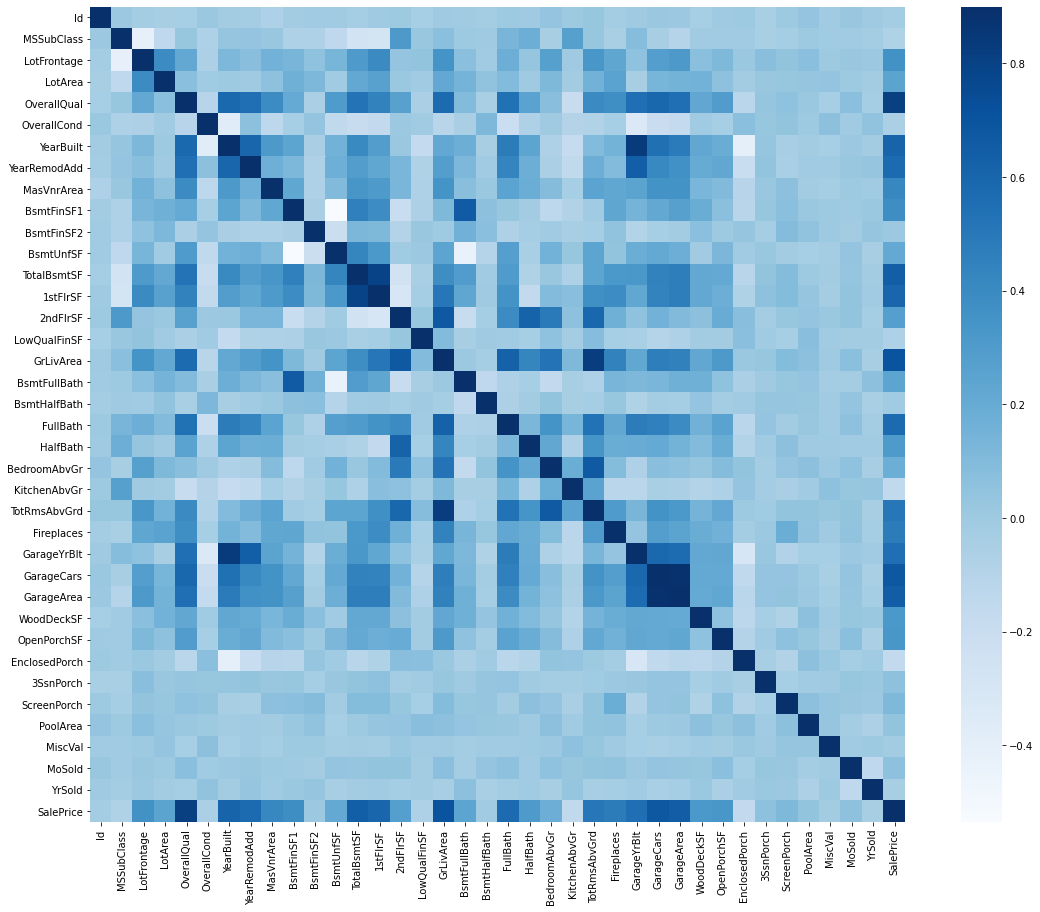

In [72]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, vmax=0.9, cmap="Blues", square=True);

In [73]:
house_reg.summary(df)

House Prices - Advanced Regression Techniques

       /^-^\ 

      / o o \ 

     /   Y   \ 

     V \ v / V

       / - \ 

      /    |

(    /     |

 ===/___) || Diego Hurtado


Dataset contains 1444 rows and 80 columns




FEATURE NAME  DATA FORMAT   NULL VALUES(NUM-PERC)          SAMPLE         

PoolQC          object         1439 - 20.891 %     nan,nan,nan,nan,

MiscFeature     object         1390 - 20.18 %      nan,nan,nan,nan,

Alley           object         1354 - 19.657 %     nan,nan,nan,nan,

Fence           object         1166 - 16.928 %     nan,nan,GdPrv,nan,

FireplaceQu     object         688 - 9.988 %       nan,nan,Gd,TA,

LotFrontage     float64        257 - 3.731 %       41.0,50.0,86.0,68.0,

GarageYrBlt     float64        79 - 1.147 %        1969.0,2006.0,1956.0,1939.0,

GarageCond      object         79 - 1.147 %        TA,TA,nan,TA,

GarageType      object         79 - 1.147 %        Detchd,Basment,Attchd,Detchd,

GarageFinish    object         79 - 1.147 %     

In [74]:
house_reg.summary_missing(df)

House Prices - Advanced Regression Techniques

Features with missing Values

       /^-^\ 

      / X X \ 

     /   Y   \ 

     V \ - / V

       /   \ 

      /    |

(    /     |

 ===/___) || Diego Hurtado


Dataset contains 1444 rows and 80 columns




FEATURE NAME  DATA FORMAT   NULL VALUES(NUM-PERC)          SAMPLE         

PoolQC          object         1439 - 20.891 %     nan,nan,nan,nan,

MiscFeature     object         1390 - 20.18 %      nan,nan,nan,nan,

Alley           object         1354 - 19.657 %     nan,nan,nan,nan,

Fence           object         1166 - 16.928 %     nan,MnPrv,MnPrv,nan,

FireplaceQu     object         688 - 9.988 %       nan,TA,Gd,nan,

LotFrontage     float64        257 - 3.731 %       nan,90.0,30.0,67.0,

GarageType      object         79 - 1.147 %        Detchd,Attchd,Detchd,Attchd,

GarageYrBlt     float64        79 - 1.147 %        2001.0,1956.0,1977.0,2004.0,

GarageFinish    object         79 - 1.147 %        RFn,Unf,RFn,Unf,

GarageQual     

In [75]:
df.dtypes[df.dtypes == "object"]

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType         object
SaleCondition   

In [76]:
df.dtypes[df.dtypes != "object"]

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
dtype: object

In [77]:
df = df[df['OverallQual'] > 5 ]
df.groupby(['OverallQual']).size().reset_index(name='counts')

,OverallQual,counts
0,6,373
1,7,317
2,8,163
3,9,42
4,10,12


## 4.3.2 Data Imputation

Data imputation is the process of replacing missing values in a dataset with estimates. Missing values can occur in a dataset for a variety of reasons, such as data being lost during collection or transmission, or because a value was not recorded for a particular observation. Handling missing values is important because many statistical techniques and machine learning algorithms are not able to handle missing values and will either produce an error or produce biased results if they are not addressed.

There are several different approaches to imputing missing values, including:

Mean imputation: Replacing the missing value with the mean value of the non-missing values for that feature.

Median imputation: Replacing the missing value with the median value of the non-missing values for that feature.

Mode imputation: Replacing the missing value with the most common value of the non-missing values for that feature.

Regression imputation: Using a regression model to predict the missing value based on the other features in the dataset.

Multiple imputation: Creating multiple versions of the dataset with different imputed values for the missing data, and then combining the results to produce a more accurate estimate.

In [78]:
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator

class DataImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy, filler):
        self.strategy = strategy
        self.fill = filler
        """
        Impute missing values.

        """
    def fit(self, X, column, strategy):
        if strategy == 'mean':
            X[column] = X[column].mean()
        elif strategy == 'median':
            X[column] = X[column].median()
        elif strategy == 'mode':
            X[column] = X[column].mode().iloc[0]
        elif strategy == 'zero':
            X[column] = X[column].fillna(0)
        elif strategy == 'none':
            X[column] = df[column].fillna("None")
                
        return X[column]

In [79]:
imputer = DataImputer(BaseEstimator, TransformerMixin)

df_clean = pd.read_csv('https://raw.githubusercontent.com/DiegoHurtad0/Linear-Regression-Model-Representation-Implementation-From-Scratch-using-Python/main/data/data_cleaning_hp.csv')

df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

## Filling missing Values

In [80]:
for i in df_clean['fill type'].unique():
    strategy = i
    for j in df_clean[df_clean['fill type'] == i]['column name'].tolist():
        column = j
        print(strategy  + column)
        df[column] = imputer.fit(df, column, strategy)

modeLotFrontage

modeElectrical

modeMSZoning

modeExterior1st

modeExterior2nd

modeKitchenQual

modeFunctional

modeSaleType

noneAlley

noneMasVnrType

noneBsmtQual

noneBsmtCond

noneBsmtExposure

noneBsmtFinType1

noneBsmtFinType2

noneFireplaceQu

noneGarageType

noneGarageFinish

noneGarageQual

noneGarageCond

nonePoolQC

noneFence

noneMiscFeature

zeroMasVnrArea

zeroGarageYrBlt

zeroBsmtFinSF1

zeroBsmtFinSF2

zeroBsmtUnfSF

zeroTotalBsmtSF

zeroBsmtFullBath

zeroBsmtHalfBath

zeroGarageCars

zeroGarageArea


In [81]:
house_reg.summary_missing(df)

House Prices - Advanced Regression Techniques

Features with missing Values

       /^-^\ 

      / X X \ 

     /   Y   \ 

     V \ - / V

       /   \ 

      /    |

(    /     |

 ===/___) || Diego Hurtado


Dataset contains 907 rows and 80 columns




FEATURE NAME  DATA FORMAT   NULL VALUES(NUM-PERC)          SAMPLE         


Percentage of Missing Values: nan

Memory Usage: 7.09

None




In [82]:
# non-numeric predictors are stored as numbers; convert them into strings
for col in ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']: df[col] = df[col].astype(str)

## 4.3.3 Create new features

In [83]:
df['Totalsq-ft'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

df['Totalsqr'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] +
                                 df['1stFlrSF'] + df['2ndFlrSF'])

df['TotalBaths'] = (df['FullBath'] + (0.5 * df['HalfBath']) +
                               df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

df['TotalPorch'] = (df['OpenPorchSF'] + df['3SsnPorch'] +
                              df['EnclosedPorch'] + df['ScreenPorch'] +
                              df['WoodDeckSF'])

In [84]:
print(df.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'M

## 4.3.4 Data transformation

In [85]:
class DataPreprocess():
    def __init__(self):
        self.strategy = None
        """
        Data transformation

        """
    
    def squares(self, res, ls):
        m = res.shape[1]
        for l in ls:
            res = res.assign(newcol=pd.Series(res[l]*res[l]).values)   
            res.columns.values[m] = l + '_sq'
            m += 1
        return res 
    
    def logs(self, res, ls):
        m = res.shape[1]
        for l in ls:
            res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
            res.columns.values[m] = l + '_log'
            m += 1
        return res

In [86]:
preprocess = DataPreprocess()

In [87]:
log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','Totalsq-ft']

In [88]:
df = preprocess.logs(df, log_features)

In [89]:
squared_features = ['YearRemodAdd', 'LotFrontage_log', 
              'TotalBsmtSF_log', '1stFlrSF_log', '2ndFlrSF_log', 'GrLivArea_log',
              'GarageCars_log', 'GarageArea_log']

df = preprocess.squares(df, squared_features)

In [90]:
df = pd.get_dummies(df).reset_index(drop=True)
print(df.shape)

(907, 314)


In [91]:
df.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,80.0,8450,7,2003,2003,196.0,706,0,150,...,1,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,6,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,80.0,11250,7,2001,2002,162.0,486,0,434,...,1,0,0,1,0,0,0,0,1,0
3,4,80.0,9550,7,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,80.0,14260,8,2000,2000,350.0,655,0,490,...,1,0,0,1,0,0,0,0,1,0


In [92]:
print(df.columns.tolist())

['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Totalsq-ft', 'Totalsqr', 'TotalBaths', 'TotalPorch', 'LotFrontage_log', 'LotArea_log', 'MasVnrArea_log', 'BsmtFinSF1_log', 'BsmtFinSF2_log', 'BsmtUnfSF_log', 'TotalBsmtSF_log', '1stFlrSF_log', '2ndFlrSF_log', 'LowQualFinSF_log', 'GrLivArea_log', 'BsmtFullBath_log', 'BsmtHalfBath_log', 'FullBath_log', 'HalfBath_log', 'BedroomAbvGr_log', 'KitchenAbvGr_log', 'TotRmsAbvGrd_log', 'Fireplaces_log', 'GarageCars_log', 'GarageArea_log', 'WoodDeckSF_log', 'OpenPorchSF_log', 'EnclosedPorch_log', '3SsnPorch_log', 'ScreenPorch_log', 'P

In [93]:
df = df.loc[:,~df.columns.duplicated()]

## For this version I am using the same variables of the previous exercise

In [94]:
X = df[['Totalsqr', 'BedroomAbvGr']].values
y = df[['SalePrice']].values
m = y.size
#Reshape y to a mx1 matrix
y = y.reshape((m, 1))

df.head(5)

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,80.0,8450,7,2003,2003,196.0,706,0,150,...,1,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,6,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,80.0,11250,7,2001,2002,162.0,486,0,434,...,1,0,0,1,0,0,0,0,1,0
3,4,80.0,9550,7,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,80.0,14260,8,2000,2000,350.0,655,0,490,...,1,0,0,1,0,0,0,0,1,0


## 4.3.5 Feature scaling

In [95]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)

# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

# call featureNormalize on the loaded data
X_scaled = scaler.transform(X)
print('Computed mean:', scaler.mean_)
print('Computed standard deviation:', sigma)

X = X_scaled

Computed mean: [2163.53252481    2.8952591 ]

Computed standard deviation: [694.55836689   0.76373828]

Computed mean: [2163.53252481    2.8952591 ]

Computed standard deviation: [694.55836689   0.76373828]


## 4.4 House Prediction

## 4.4.1 Train and test datasets

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

## 4.4.2 Prediction using simple regression model

In [97]:
size_ft = 2416 # sq-ft
bathrooms = 3

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Create linear regression 
reg = LinearRegression()

#Train the model using the training sets
reg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)
print('The accuracy of the Linear Regression',r2_score(y_test,y_pred))
print('The 𝜃 value: ' + str(reg.intercept_[0]) + ' , ' + str(reg.coef_[0][0]))
print('Predicted price of a ' + str(size_ft) + ' sq-ft, 3 br house (linear_model.LinearRegression):', round(reg.predict(np.array([[(size_ft - mu[0])/sigma[0], (bathrooms - mu[1]) / sigma[1]]]))[0][0], 1) )
print ('RMSE: ', mean_squared_error(y_test, y_pred))

The accuracy of the Linear Regression 0.5324419858638005

The 𝜃 value: 12.205963835942574 , 0.21903262711819962

Predicted price of a 2416 sq-ft, 3 br house (linear_model.LinearRegression): 12.3

RMSE:  0.056689156541190076


In [99]:
from sklearn.linear_model import Ridge

#Create Ridge regression 
ridge = Ridge()

#Train the model using the training sets
ridge.fit(X_train, y_train)
b = float(ridge.intercept_)

# Make predictions using the testing set - Ridge Regression
test_ridge = ridge.predict(X_test)
print('The accuracy of the Ridge Regression is', r2_score(y_test, test_ridge))
print('Predicted price of a ' + str(size_ft) + ' sq-ft, 3 br house (linear_model.Lasso):', round( ridge.predict(np.array([[(size_ft - mu[0])/sigma[0], (bathrooms - mu[1]) / sigma[1]]]))[0][0] , 2) )

The accuracy of the Ridge Regression is 0.5322114893372971

Predicted price of a 2416 sq-ft, 3 br house (linear_model.Lasso): 12.28


In [100]:
df[['Totalsqr', 'BedroomAbvGr', 'SalePrice']].head(1)

,Totalsqr,BedroomAbvGr,SalePrice
0,2416,3,12.247699


## 4.4.3 Advanced Regression Techniques

The next step for this nootebook is to use more complex methods like:

- XGBoost Regressor

- Light Gradient Boosting Regressor

- Support Vector Regressor

- Gradient Boosting Regressor

- Random Forest Regressor

## 5 Conclusions

The goal of this nootebooks is to explain the Model Representation of linear Regression and the implementation from scratch to understand what is behind the pre build clases of models and comparing the implementation with the pre build clases of sklearn 

## Coments ?

<img src="https://www.vectorlogo.zone/logos/linkedin/linkedin-tile.svg" align='left' alt="plotly" width="60" height="60"/> </a><a> 
[Msc. Diego Hurtado](https://www.linkedin.com/in/diegohurtadoo/)

<img src="https://www.vectorlogo.zone/logos/github/github-tile.svg" align='left' alt="plotly" width="60" height="60"/> </a><a> 
[Msc. Diego Hurtado](https://github.com/DiegoHurtad0)

<img src="https://www.vectorlogo.zone/logos/medium/medium-tile.svg" align='left' alt="plotly" width="60" height="60"/> </a><a> 
[Msc. Diego O’HURTADO](https://medium.com/@diego.hurtado.olivares)

<img src="https://raw.githubusercontent.com/DiegoHurtad0/Covid-19-Dataset-Mexico/master/wave.svg" width="900" height="600">

[Msc. Diego Hurtado](https://www.linkedin.com/in/diegohurtadoo/)